## 전처리

In [2]:
import pandas as pd

In [33]:
# 크롤링 합본 불러오기
data = pd.read_excel("naver_cafe_ssal_contents_2019.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     11778 non-null  object
 1   nickname  11778 non-null  object
 2   date      11778 non-null  object
 3   content   11773 non-null  object
 4   comments  11068 non-null  object
dtypes: object(5)
memory usage: 460.2+ KB


In [5]:
data["nickname"].value_counts()

전주전임 미네2017    33
웬디KM479        32
빵빵하고지고         28
예스케잌           28
인천 연꽃시루        27
               ..
진앤한맘            1
후니혀니 공장         1
유니유니서유니         1
은하수s            1
쬬니맘86방서         1
Name: nickname, Length: 10115, dtype: int64

In [6]:
# 중복 15개 이상 닉네임 제거
idva = data["nickname"].value_counts()
idvali = idva[idva >= 15].index.tolist()
idvali

['전주전임 미네2017',
 '웬디KM479',
 '빵빵하고지고',
 '예스케잌',
 '인천 연꽃시루',
 '빵긋한날',
 'N포유키친쿠킹',
 '꽃짜는방매',
 '단미케이크v89v연향',
 '다율']

In [7]:
data2 = data
for i in idvali:
    data2 = data2[data2["nickname"] != i]
data2 = data2.iloc[:, :5].reindex()
data2

,title,nickname,date,content,comments
0,다운타운 **름 썩은곰팡이 쌀 ..,taniamama,2019.01.30,"안녕하세요,,18개월 아기 기르는 엄마입니다..이럴땐 어떻게 대처 해야할지 모르겠어...",요즘 여기 쌀 할인하던데 같은쌀일까요||전 2018년 10월에 풍 * 햅쌀 이라고 ...
1,"쌀마들렌 3종(모카, 허니유자, 쑥)",쪼로밋,2019.01.08,엄청 오랜만에 베이킹 하는거 같네용..ㅠㅠ버터도 거의바닥이었고..가루류도 없는데다가...,쑥 마들렌!! 완전 맛나겠다용~~~쑥향 솔솔~~😍||콩가루 묻힐까하다가 깔끔한게 나...
2,쌀에 넣어놓은 숯에 벌레가 ㅠ,연슈,2019.01.17,벌레얘기 죄송해요 ㅠ쌀을 상온 보관 중인데(냉장고에 도저히 자리가 안나서)혹시나 쌀...,"숯, 마늘 넣어두면 벌레 안 생기다는 말 들었는데\n생기는군요 ㅠㅠ\n전 겨울엔 락..."
3,"67,000 원짜리 쌀 개봉했습니다!",박지마미,2019.01.14,오늘 저희 집 쌀이 없어서 2식은 분식으로 떼웠는데남편이가 쌀을 사오긴 사왔는데매대...,악..비싸네요ㅠ\n그만큼 더 찰지고 맛있을꺼예요~ ㅎㅎ\n\n근데 저도 실한올잡아서...
4,첨으로 베트남쌀로 밥지었어요.,조은사람,2019.01.26,처음와서는 일본품종쌀 주문해먹었었고.그담엔 한국쌀먹었는데~마트에서 한국아주머니께서 ...,저도 베트남쌀 사먹어요~~생각보다 맛있더라구요~~||그니까요. 맛도없고 냄새도날줄...
...,...,...,...,...,...
11773,잊고 있었던 티몬 쌀,부산무진,2019.12.24,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...,장사두안되고 ~\n손님도 없고~~\n심심해요 ㅡㅡ;;;||장사도 안되고 \n손님도 ...
11774,"돌전후 아기신발(완료) , 쌀튀밥(완료) 드림 ^^",장군맘 ㅋ,2019.12.15,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...,쌀튀밥 받고시퍼요||네 챗드릴게요 ㅋ||운동화 120받고싶어요||네 챗드릴게요||혹...
11775,맘마밀 이유식 5개.퓨레 4개. 쌀과자1봉,린n은v83v둔덕,2019.12.01,맘마밀 안심이유식 단호박과 소고기 5개사과와 고구마 퓨레 4개 (20년 5월까지)요...,NaN
11776,농협쌀 2019년11월도정 20키로 저렵하게팝니다.,광주냥이맘,2019.12.01,2018년 도정 인터넷최저가 59000원넘어요 2019년 도정 인터넷최저가 6500...,NaN


In [8]:
norice = ["출산가방", "오줌", "리퀘", "Resoruce", "쌀흥하는", "쌀스럽다", "우리쌀님", "닭모이용", "쌀때", "카인", "힐더", "소환권", "비쌀때", "마리쌀"]

for i in norice:
    data2 = data2[data2['content'].str.contains(i) != True]
data2

,title,nickname,date,content,comments
0,다운타운 **름 썩은곰팡이 쌀 ..,taniamama,2019.01.30,"안녕하세요,,18개월 아기 기르는 엄마입니다..이럴땐 어떻게 대처 해야할지 모르겠어...",요즘 여기 쌀 할인하던데 같은쌀일까요||전 2018년 10월에 풍 * 햅쌀 이라고 ...
1,"쌀마들렌 3종(모카, 허니유자, 쑥)",쪼로밋,2019.01.08,엄청 오랜만에 베이킹 하는거 같네용..ㅠㅠ버터도 거의바닥이었고..가루류도 없는데다가...,쑥 마들렌!! 완전 맛나겠다용~~~쑥향 솔솔~~😍||콩가루 묻힐까하다가 깔끔한게 나...
2,쌀에 넣어놓은 숯에 벌레가 ㅠ,연슈,2019.01.17,벌레얘기 죄송해요 ㅠ쌀을 상온 보관 중인데(냉장고에 도저히 자리가 안나서)혹시나 쌀...,"숯, 마늘 넣어두면 벌레 안 생기다는 말 들었는데\n생기는군요 ㅠㅠ\n전 겨울엔 락..."
3,"67,000 원짜리 쌀 개봉했습니다!",박지마미,2019.01.14,오늘 저희 집 쌀이 없어서 2식은 분식으로 떼웠는데남편이가 쌀을 사오긴 사왔는데매대...,악..비싸네요ㅠ\n그만큼 더 찰지고 맛있을꺼예요~ ㅎㅎ\n\n근데 저도 실한올잡아서...
4,첨으로 베트남쌀로 밥지었어요.,조은사람,2019.01.26,처음와서는 일본품종쌀 주문해먹었었고.그담엔 한국쌀먹었는데~마트에서 한국아주머니께서 ...,저도 베트남쌀 사먹어요~~생각보다 맛있더라구요~~||그니까요. 맛도없고 냄새도날줄...
...,...,...,...,...,...
11773,잊고 있었던 티몬 쌀,부산무진,2019.12.24,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...,장사두안되고 ~\n손님도 없고~~\n심심해요 ㅡㅡ;;;||장사도 안되고 \n손님도 ...
11774,"돌전후 아기신발(완료) , 쌀튀밥(완료) 드림 ^^",장군맘 ㅋ,2019.12.15,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...,쌀튀밥 받고시퍼요||네 챗드릴게요 ㅋ||운동화 120받고싶어요||네 챗드릴게요||혹...
11775,맘마밀 이유식 5개.퓨레 4개. 쌀과자1봉,린n은v83v둔덕,2019.12.01,맘마밀 안심이유식 단호박과 소고기 5개사과와 고구마 퓨레 4개 (20년 5월까지)요...,NaN
11776,농협쌀 2019년11월도정 20키로 저렵하게팝니다.,광주냥이맘,2019.12.01,2018년 도정 인터넷최저가 59000원넘어요 2019년 도정 인터넷최저가 6500...,NaN


In [9]:
nnorice = ["드림", "유학", "배달직원", "알바", "팝니다","한율", "거래", "공지"]

for i in nnorice:
    data2 = data2[data2['content'].str.contains(i) != True]
data2

,title,nickname,date,content,comments
0,다운타운 **름 썩은곰팡이 쌀 ..,taniamama,2019.01.30,"안녕하세요,,18개월 아기 기르는 엄마입니다..이럴땐 어떻게 대처 해야할지 모르겠어...",요즘 여기 쌀 할인하던데 같은쌀일까요||전 2018년 10월에 풍 * 햅쌀 이라고 ...
1,"쌀마들렌 3종(모카, 허니유자, 쑥)",쪼로밋,2019.01.08,엄청 오랜만에 베이킹 하는거 같네용..ㅠㅠ버터도 거의바닥이었고..가루류도 없는데다가...,쑥 마들렌!! 완전 맛나겠다용~~~쑥향 솔솔~~😍||콩가루 묻힐까하다가 깔끔한게 나...
2,쌀에 넣어놓은 숯에 벌레가 ㅠ,연슈,2019.01.17,벌레얘기 죄송해요 ㅠ쌀을 상온 보관 중인데(냉장고에 도저히 자리가 안나서)혹시나 쌀...,"숯, 마늘 넣어두면 벌레 안 생기다는 말 들었는데\n생기는군요 ㅠㅠ\n전 겨울엔 락..."
3,"67,000 원짜리 쌀 개봉했습니다!",박지마미,2019.01.14,오늘 저희 집 쌀이 없어서 2식은 분식으로 떼웠는데남편이가 쌀을 사오긴 사왔는데매대...,악..비싸네요ㅠ\n그만큼 더 찰지고 맛있을꺼예요~ ㅎㅎ\n\n근데 저도 실한올잡아서...
4,첨으로 베트남쌀로 밥지었어요.,조은사람,2019.01.26,처음와서는 일본품종쌀 주문해먹었었고.그담엔 한국쌀먹었는데~마트에서 한국아주머니께서 ...,저도 베트남쌀 사먹어요~~생각보다 맛있더라구요~~||그니까요. 맛도없고 냄새도날줄...
...,...,...,...,...,...
11770,[거제수월자이점] 오늘의 간식은 쌀과자,거제수월자이점,2019.12.17,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕,||
11771,40mm매일 분유스푼으로 쌀가루 몇그램 나올까요?,새로운시작,2019.12.13,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다,혹시분유통있으신가요? 1스푼에 몇그램이라고써져있는데... 저50ml분유스푼쓰는데 그...
11773,잊고 있었던 티몬 쌀,부산무진,2019.12.24,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...,장사두안되고 ~\n손님도 없고~~\n심심해요 ㅡㅡ;;;||장사도 안되고 \n손님도 ...
11774,"돌전후 아기신발(완료) , 쌀튀밥(완료) 드림 ^^",장군맘 ㅋ,2019.12.15,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...,쌀튀밥 받고시퍼요||네 챗드릴게요 ㅋ||운동화 120받고싶어요||네 챗드릴게요||혹...


In [10]:
nnnorice = ["쌀화환", "쌀레에빼배", "쌀박물관", "쌀쌀한 날씨", "쌀뗴냐", "쌀 부가세", "그래프",
            '북한', "항쟁", '의원', "닭모이",
            "골동품", '민속품', '놀이', "빨대", '스킨', "토너", "에센스", "한율", "조성", '시범', '분배', "공양"]

In [11]:
for i in nnnorice:
    data2 = data2[data2['content'].str.contains(i) != True]
data2


,title,nickname,date,content,comments
0,다운타운 **름 썩은곰팡이 쌀 ..,taniamama,2019.01.30,"안녕하세요,,18개월 아기 기르는 엄마입니다..이럴땐 어떻게 대처 해야할지 모르겠어...",요즘 여기 쌀 할인하던데 같은쌀일까요||전 2018년 10월에 풍 * 햅쌀 이라고 ...
1,"쌀마들렌 3종(모카, 허니유자, 쑥)",쪼로밋,2019.01.08,엄청 오랜만에 베이킹 하는거 같네용..ㅠㅠ버터도 거의바닥이었고..가루류도 없는데다가...,쑥 마들렌!! 완전 맛나겠다용~~~쑥향 솔솔~~😍||콩가루 묻힐까하다가 깔끔한게 나...
2,쌀에 넣어놓은 숯에 벌레가 ㅠ,연슈,2019.01.17,벌레얘기 죄송해요 ㅠ쌀을 상온 보관 중인데(냉장고에 도저히 자리가 안나서)혹시나 쌀...,"숯, 마늘 넣어두면 벌레 안 생기다는 말 들었는데\n생기는군요 ㅠㅠ\n전 겨울엔 락..."
3,"67,000 원짜리 쌀 개봉했습니다!",박지마미,2019.01.14,오늘 저희 집 쌀이 없어서 2식은 분식으로 떼웠는데남편이가 쌀을 사오긴 사왔는데매대...,악..비싸네요ㅠ\n그만큼 더 찰지고 맛있을꺼예요~ ㅎㅎ\n\n근데 저도 실한올잡아서...
4,첨으로 베트남쌀로 밥지었어요.,조은사람,2019.01.26,처음와서는 일본품종쌀 주문해먹었었고.그담엔 한국쌀먹었는데~마트에서 한국아주머니께서 ...,저도 베트남쌀 사먹어요~~생각보다 맛있더라구요~~||그니까요. 맛도없고 냄새도날줄...
...,...,...,...,...,...
11770,[거제수월자이점] 오늘의 간식은 쌀과자,거제수월자이점,2019.12.17,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕,||
11771,40mm매일 분유스푼으로 쌀가루 몇그램 나올까요?,새로운시작,2019.12.13,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다,혹시분유통있으신가요? 1스푼에 몇그램이라고써져있는데... 저50ml분유스푼쓰는데 그...
11773,잊고 있었던 티몬 쌀,부산무진,2019.12.24,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...,장사두안되고 ~\n손님도 없고~~\n심심해요 ㅡㅡ;;;||장사도 안되고 \n손님도 ...
11774,"돌전후 아기신발(완료) , 쌀튀밥(완료) 드림 ^^",장군맘 ㅋ,2019.12.15,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...,쌀튀밥 받고시퍼요||네 챗드릴게요 ㅋ||운동화 120받고싶어요||네 챗드릴게요||혹...


In [13]:
writer = pd.ExcelWriter('naver_cafe_ssal_contents_2019_전처리완.xlsx')
data2.to_excel(writer,index =False)
writer.save()

## 빈도분석

In [2]:
#import hangul_font
import warnings
from selenium import webdriver
import requests
from bs4 import BeautifulSoup
import time
import numpy as np
import pandas as pd
from selenium.webdriver.common.keys import Keys
import urllib.request as req
import urllib.parse as par
from konlpy.tag import Okt
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

warnings.filterwarnings(action='ignore')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'

In [7]:
df = pd.read_excel('crawl/naver_cafe_ssal_contents_2019_전처리완.xlsx')
df.head()

,title,nickname,date,content,comments
0,다운타운 **름 썩은곰팡이 쌀 ..,taniamama,2019.01.30,"안녕하세요,,18개월 아기 기르는 엄마입니다..이럴땐 어떻게 대처 해야할지 모르겠어...",요즘 여기 쌀 할인하던데 같은쌀일까요||전 2018년 10월에 풍 * 햅쌀 이라고 ...
1,"쌀마들렌 3종(모카, 허니유자, 쑥)",쪼로밋,2019.01.08,엄청 오랜만에 베이킹 하는거 같네용..ㅠㅠ버터도 거의바닥이었고..가루류도 없는데다가...,쑥 마들렌!! 완전 맛나겠다용~~~쑥향 솔솔~~😍||콩가루 묻힐까하다가 깔끔한게 나...
2,쌀에 넣어놓은 숯에 벌레가 ㅠ,연슈,2019.01.17,벌레얘기 죄송해요 ㅠ쌀을 상온 보관 중인데(냉장고에 도저히 자리가 안나서)혹시나 쌀...,"숯, 마늘 넣어두면 벌레 안 생기다는 말 들었는데\n생기는군요 ㅠㅠ\n전 겨울엔 락..."
3,"67,000 원짜리 쌀 개봉했습니다!",박지마미,2019.01.14,오늘 저희 집 쌀이 없어서 2식은 분식으로 떼웠는데남편이가 쌀을 사오긴 사왔는데매대...,악..비싸네요ㅠ\n그만큼 더 찰지고 맛있을꺼예요~ ㅎㅎ\n\n근데 저도 실한올잡아서...
4,첨으로 베트남쌀로 밥지었어요.,조은사람,2019.01.26,처음와서는 일본품종쌀 주문해먹었었고.그담엔 한국쌀먹었는데~마트에서 한국아주머니께서 ...,저도 베트남쌀 사먹어요~~생각보다 맛있더라구요~~||그니까요. 맛도없고 냄새도날줄...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554 entries, 0 to 9553
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     9554 non-null   object
 1   nickname  9554 non-null   object
 2   date      9554 non-null   object
 3   content   9549 non-null   object
 4   comments  9036 non-null   object
dtypes: object(5)
memory usage: 373.3+ KB


In [9]:
df = df.dropna(axis=0, how='any', subset=['content'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9549 entries, 0 to 9553
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     9549 non-null   object
 1   nickname  9549 non-null   object
 2   date      9549 non-null   object
 3   content   9549 non-null   object
 4   comments  9032 non-null   object
dtypes: object(5)
memory usage: 447.6+ KB


In [10]:
df = df.reset_index()
df

,index,title,nickname,date,content,comments
0,0,다운타운 **름 썩은곰팡이 쌀 ..,taniamama,2019.01.30,"안녕하세요,,18개월 아기 기르는 엄마입니다..이럴땐 어떻게 대처 해야할지 모르겠어...",요즘 여기 쌀 할인하던데 같은쌀일까요||전 2018년 10월에 풍 * 햅쌀 이라고 ...
1,1,"쌀마들렌 3종(모카, 허니유자, 쑥)",쪼로밋,2019.01.08,엄청 오랜만에 베이킹 하는거 같네용..ㅠㅠ버터도 거의바닥이었고..가루류도 없는데다가...,쑥 마들렌!! 완전 맛나겠다용~~~쑥향 솔솔~~😍||콩가루 묻힐까하다가 깔끔한게 나...
2,2,쌀에 넣어놓은 숯에 벌레가 ㅠ,연슈,2019.01.17,벌레얘기 죄송해요 ㅠ쌀을 상온 보관 중인데(냉장고에 도저히 자리가 안나서)혹시나 쌀...,"숯, 마늘 넣어두면 벌레 안 생기다는 말 들었는데\n생기는군요 ㅠㅠ\n전 겨울엔 락..."
3,3,"67,000 원짜리 쌀 개봉했습니다!",박지마미,2019.01.14,오늘 저희 집 쌀이 없어서 2식은 분식으로 떼웠는데남편이가 쌀을 사오긴 사왔는데매대...,악..비싸네요ㅠ\n그만큼 더 찰지고 맛있을꺼예요~ ㅎㅎ\n\n근데 저도 실한올잡아서...
4,4,첨으로 베트남쌀로 밥지었어요.,조은사람,2019.01.26,처음와서는 일본품종쌀 주문해먹었었고.그담엔 한국쌀먹었는데~마트에서 한국아주머니께서 ...,저도 베트남쌀 사먹어요~~생각보다 맛있더라구요~~||그니까요. 맛도없고 냄새도날줄...
...,...,...,...,...,...,...
9544,9549,[거제수월자이점] 오늘의 간식은 쌀과자,거제수월자이점,2019.12.17,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕,||
9545,9550,40mm매일 분유스푼으로 쌀가루 몇그램 나올까요?,새로운시작,2019.12.13,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다,혹시분유통있으신가요? 1스푼에 몇그램이라고써져있는데... 저50ml분유스푼쓰는데 그...
9546,9551,잊고 있었던 티몬 쌀,부산무진,2019.12.24,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...,장사두안되고 ~\n손님도 없고~~\n심심해요 ㅡㅡ;;;||장사도 안되고 \n손님도 ...
9547,9552,"돌전후 아기신발(완료) , 쌀튀밥(완료) 드림 ^^",장군맘 ㅋ,2019.12.15,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...,쌀튀밥 받고시퍼요||네 챗드릴게요 ㅋ||운동화 120받고싶어요||네 챗드릴게요||혹...


In [11]:
df.iloc[:,1:]

,title,nickname,date,content,comments
0,다운타운 **름 썩은곰팡이 쌀 ..,taniamama,2019.01.30,"안녕하세요,,18개월 아기 기르는 엄마입니다..이럴땐 어떻게 대처 해야할지 모르겠어...",요즘 여기 쌀 할인하던데 같은쌀일까요||전 2018년 10월에 풍 * 햅쌀 이라고 ...
1,"쌀마들렌 3종(모카, 허니유자, 쑥)",쪼로밋,2019.01.08,엄청 오랜만에 베이킹 하는거 같네용..ㅠㅠ버터도 거의바닥이었고..가루류도 없는데다가...,쑥 마들렌!! 완전 맛나겠다용~~~쑥향 솔솔~~😍||콩가루 묻힐까하다가 깔끔한게 나...
2,쌀에 넣어놓은 숯에 벌레가 ㅠ,연슈,2019.01.17,벌레얘기 죄송해요 ㅠ쌀을 상온 보관 중인데(냉장고에 도저히 자리가 안나서)혹시나 쌀...,"숯, 마늘 넣어두면 벌레 안 생기다는 말 들었는데\n생기는군요 ㅠㅠ\n전 겨울엔 락..."
3,"67,000 원짜리 쌀 개봉했습니다!",박지마미,2019.01.14,오늘 저희 집 쌀이 없어서 2식은 분식으로 떼웠는데남편이가 쌀을 사오긴 사왔는데매대...,악..비싸네요ㅠ\n그만큼 더 찰지고 맛있을꺼예요~ ㅎㅎ\n\n근데 저도 실한올잡아서...
4,첨으로 베트남쌀로 밥지었어요.,조은사람,2019.01.26,처음와서는 일본품종쌀 주문해먹었었고.그담엔 한국쌀먹었는데~마트에서 한국아주머니께서 ...,저도 베트남쌀 사먹어요~~생각보다 맛있더라구요~~||그니까요. 맛도없고 냄새도날줄...
...,...,...,...,...,...
9544,[거제수월자이점] 오늘의 간식은 쌀과자,거제수월자이점,2019.12.17,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕,||
9545,40mm매일 분유스푼으로 쌀가루 몇그램 나올까요?,새로운시작,2019.12.13,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다,혹시분유통있으신가요? 1스푼에 몇그램이라고써져있는데... 저50ml분유스푼쓰는데 그...
9546,잊고 있었던 티몬 쌀,부산무진,2019.12.24,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...,장사두안되고 ~\n손님도 없고~~\n심심해요 ㅡㅡ;;;||장사도 안되고 \n손님도 ...
9547,"돌전후 아기신발(완료) , 쌀튀밥(완료) 드림 ^^",장군맘 ㅋ,2019.12.15,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...,쌀튀밥 받고시퍼요||네 챗드릴게요 ㅋ||운동화 120받고싶어요||네 챗드릴게요||혹...


In [14]:
"""def normalize(x):
    nouns_tagger = Okt()
    normalized = nouns_tagger.normalize(x)
    

# 'ko_text' 피처에 적용
df['normalized'] = df['content'].apply(lambda x: normalize(x))
print(df.shape)
df.head(20)"""

"def normalize(x):\n    nouns_tagger = Okt()\n    normalized = nouns_tagger.normalize(x)\n    \n\n# 'ko_text' 피처에 적용\ndf['normalized'] = df['content'].apply(lambda x: normalize(x))\nprint(df.shape)\ndf.head(20)"

In [15]:
del df['normalized']

In [18]:
q = " "
for i in range(9549):
    try:
     q += df['content'][i]
    except:
     pass

In [19]:
nouns_tagger = Okt()
p = nouns_tagger.normalize(q)

In [21]:
nouns = nouns_tagger.nouns(p)

In [55]:
stopwords = ['천원', '꼭걸', '먹이', '그날', '삭제', '키', '정말', '입', '만', '포스팅', '약간', '정보', '말', '어제', '옵션', '아래', '분', '처음', '개', '년', '혹시', '사람', '시', '추천', '쌀', '애', '저희', '로', '이용', '판매', '체', '가요', '사', '번호', '이제', '나', '을', '경우', '오늘', '아주', '진짜', '모두', '자동', '날', '시골', '는', '손', '생각', '질문', '연락', '살', '역시', '센치', '구입', '끼', '용', '사실', '것', '배', '위', '요즘', '다른', '지금', '불', '시작', '다시', '우리', '은', '사랑', '거', '킹', '제품', '등', '조금', '내', '이후', '앞', '줄', '단계', '이번', '직접', '이', '재생', '좀', '미니', '봉', '가', '맘', '월', '듯', '중', '저', '신분', '첫', '미리', '더', '사용', '여기', '농사', '요', '한번', '작성', '게시', '주문', '어디', '농', '산', '개월', '거의', '안', '를', '완전', '제', '및', '실', '글', '원', '다음', '위해', '곳', '그냥', '구매', '초기', '준비', '도', '계속', '때', '유통', '살짝', '먹기', '후', '나눔', '때모두', '댓글', '알', '규정', '정도', '점', '스푼', '얼마', '화질', '일', '못', '마을', '만원', '아시', '하루', '걸', '전', '바로', '수', '또', '중기', '번', '먼저', '달', '기', '건', '반', '구', '숟가락', '사진', '선택', '사서', '호', '완성', '가지', '뭐', '가장', '내일', '공지', '때문', '방법', '보고', '이상', '끝', '하나', '해', '사항', '한국', '그', '습', '꼭', '왜', '떡뻥']

In [54]:
nouns2 = nouns

In [56]:
# 데이터 정제
for anoun in nouns2:
    if anoun in stopwords_nouns:
      nouns2.remove(anoun)

    if anoun =='아가' :
      nouns2.remove(anoun)
      nouns2.append('아이')
    
    if anoun =='아기':
      nouns2.remove(anoun)
      nouns2.append('아이')

    if anoun =='애기':
      nouns2.remove(anoun)
      nouns2.append('아이')

    if anoun == '베이':
      nouns2.remove(anoun)
      nouns2.append('베이킹')
    
    if anoun == '쌀벌레':
      nouns2.remove(anoun)
      nouns2.append('벌레')

    if anoun == '바구미':
      nouns2.remove(anoun)
      nouns2.append('벌레')

    if anoun == '벌래':
      nouns2.remove(anoun)
      nouns2.append('벌레')

    if anoun == '쌀벌래':
      nouns2.remove(anoun)
      nouns2.append('벌레')

    if anoun == '배송':
      nouns2.remove(anoun)
      nouns2.append('배달')

    if anoun == '택배':
      nouns2.remove(anoun)
      nouns2.append('배달')
      
    if anoun == '기한':
      nouns2.remove(anoun)
      nouns2.append('유통기한')

    if anoun == '박력':
      nouns2.remove(anoun)
      nouns2.append('박력분')


In [57]:
count = Counter(nouns2)
count

Counter({'엄마': 312,
         '땐': 104,
         '대처': 7,
         '보통': 182,
         '아들': 164,
         '밥': 1960,
         '늘': 177,
         '보관': 774,
         '문제': 148,
         '도지': 6,
         '현상': 18,
         '자주': 138,
         '쯤': 49,
         '누렇': 15,
         '변색': 7,
         '센트': 4,
         '크기': 79,
         '가끔': 84,
         '그때': 104,
         '만해': 19,
         '깜짝': 21,
         '봉지': 282,
         '바닥': 57,
         '어른': 90,
         '손바닥': 8,
         '크게': 75,
         '곰팡이': 368,
         '그동안': 81,
         '뭉탱이': 1,
         '름': 11,
         '전화': 106,
         '커스터': 2,
         '머': 31,
         '서비스': 55,
         '사과': 125,
         '며': 28,
         '옆': 114,
         '수납': 9,
         '싱크대': 10,
         '하니': 161,
         '거사': 8,
         '기미': 47,
         '돌이': 29,
         '말씀': 63,
         '일단': 152,
         '쥐': 15,
         '김': 94,
         '핀': 33,
         '생선': 15,
         '배추': 14,
         '갈라': 5,
         '아침': 303,
       

In [58]:
words = dict(count.most_common(300))
words

{'가루': 4012,
 '아이': 2112,
 '밥': 1960,
 '맛': 1688,
 '이유식': 1667,
 '미음': 993,
 '집': 963,
 '배달': 923,
 '물': 886,
 '식빵': 787,
 '보관': 774,
 '과자': 762,
 '떡': 669,
 '벌레': 657,
 '찹쌀': 656,
 '현미': 644,
 '빵': 615,
 '케이크': 592,
 '마트': 578,
 '수업': 562,
 '시간': 558,
 '베이킹': 500,
 '밀가루': 488,
 '도정': 465,
 '유기농': 462,
 '가격': 443,
 '레시피': 428,
 '간식': 410,
 '포장': 402,
 '반죽': 373,
 '카페': 372,
 '통': 371,
 '곰팡이': 368,
 '재료': 360,
 '유통기한': 338,
 '저녁': 336,
 '햅쌀': 330,
 '선물': 324,
 '엄마': 312,
 '포대': 311,
 '후기': 309,
 '아침': 303,
 '밥맛': 295,
 '냄새': 291,
 '봉지': 282,
 '품종': 279,
 '쿠키': 277,
 '박스': 275,
 '양': 274,
 '향': 273,
 '초코': 264,
 '박력분': 249,
 '인터넷': 248,
 '설탕': 247,
 '잡곡': 247,
 '일본': 243,
 '걱정': 242,
 '카스테라': 241,
 '냉장고': 238,
 '검색': 238,
 '우유': 236,
 '고민': 236,
 '백미': 236,
 '신랑': 235,
 '영상': 231,
 '냉동': 227,
 '느낌': 225,
 '방앗간': 223,
 '야채': 223,
 '남편': 222,
 '차': 220,
 '발효': 220,
 '입자': 219,
 '포': 214,
 '원래': 213,
 '교환': 213,
 '상태': 204,
 '친정': 202,
 '고구마': 202,
 '복사': 202,
 '클래스': 201,
 '도움말': 200,
 '근처

In [59]:
df = pd.DataFrame(list(words.items()), columns=['word', 'cnt'])
df.head(20)

,word,cnt
0,가루,4012
1,아이,2112
2,밥,1960
3,맛,1688
4,이유식,1667
5,미음,993
6,집,963
7,배달,923
8,물,886
9,식빵,787


In [49]:
df.to_csv('data/2019카페_빈도분석_re.csv', encoding='utf-8-sig')

In [4]:
df = pd.read_csv('data/cafe2019_top300.xlsx')
df

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2


In [60]:
df.to_excel("data/cafe2019_top300.xlsx")

In [100]:
#remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
# remove_char_counter = Counter(
#     {x: remove_char_counter[x] for x in count if x not in stopwords})

#print(remove_char_counter)

In [51]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
import nltk
# 한글폰트 사용
plt.rcParams['font.family'] = 'Malgun Gothic' 
mpl.rc('axes', unicode_minus=False)

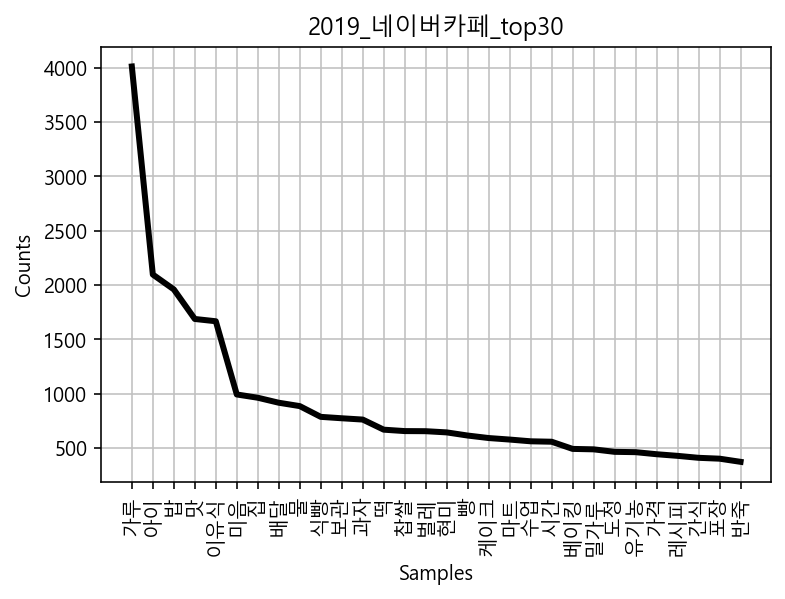

<AxesSubplot:title={'center':'2019_네이버카페_top30'}, xlabel='Samples', ylabel='Counts'>

In [52]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
fregra = nltk.FreqDist(count)
fregra.plot(30, cumulative=False, color='black', title="2019_네이버카페_top30", linewidth=3)
#plt.title('네이버카페_2019_쌀')


#fregra.plot(30)

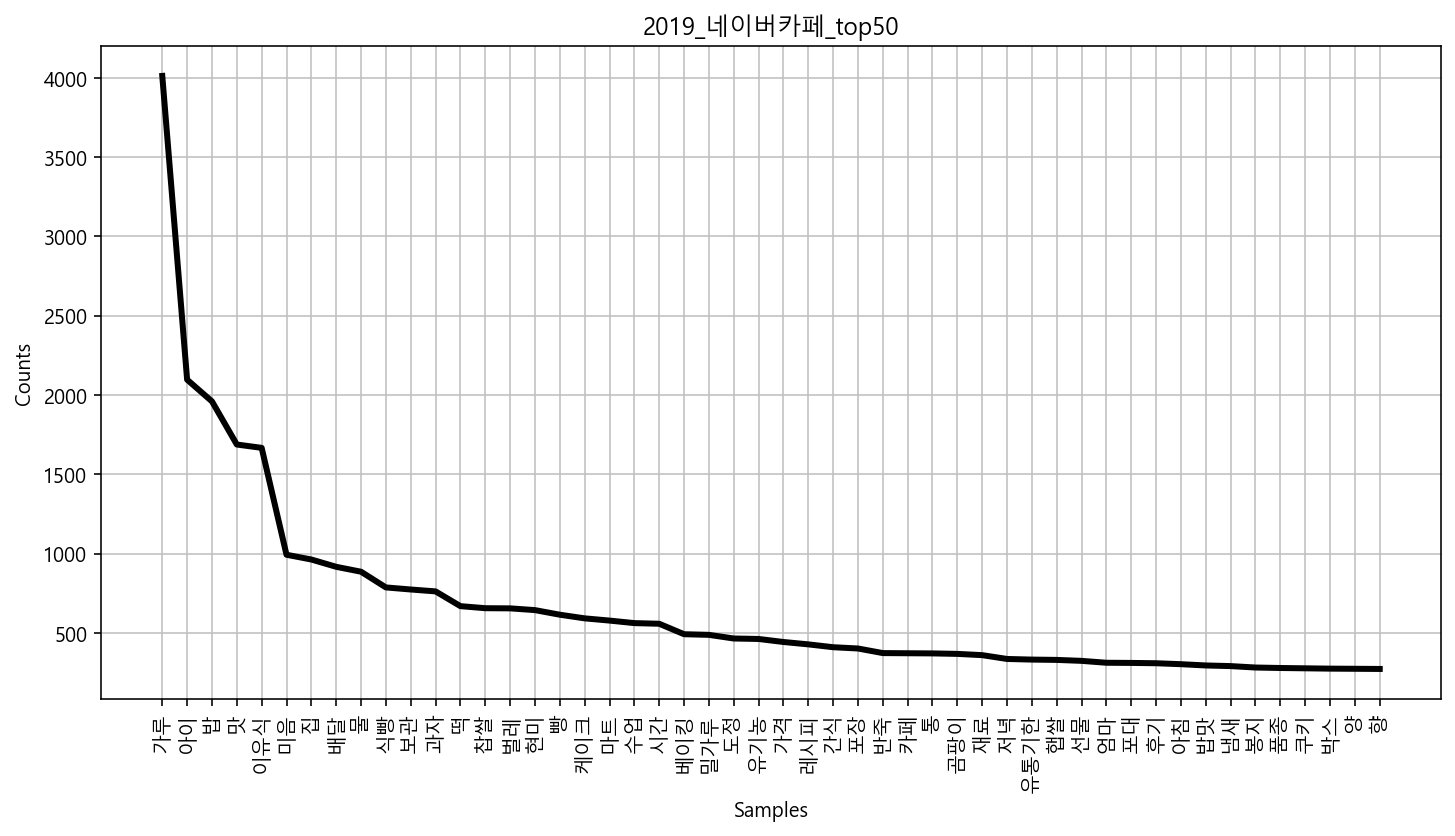

<AxesSubplot:title={'center':'2019_네이버카페_top50'}, xlabel='Samples', ylabel='Counts'>

In [53]:
fregra2 = nltk.FreqDist(count)
plt.figure(figsize=(12,6))
fregra2.plot(50, cumulative=False, color='black',
            title="2019_네이버카페_top50", linewidth=3)

185086
16787


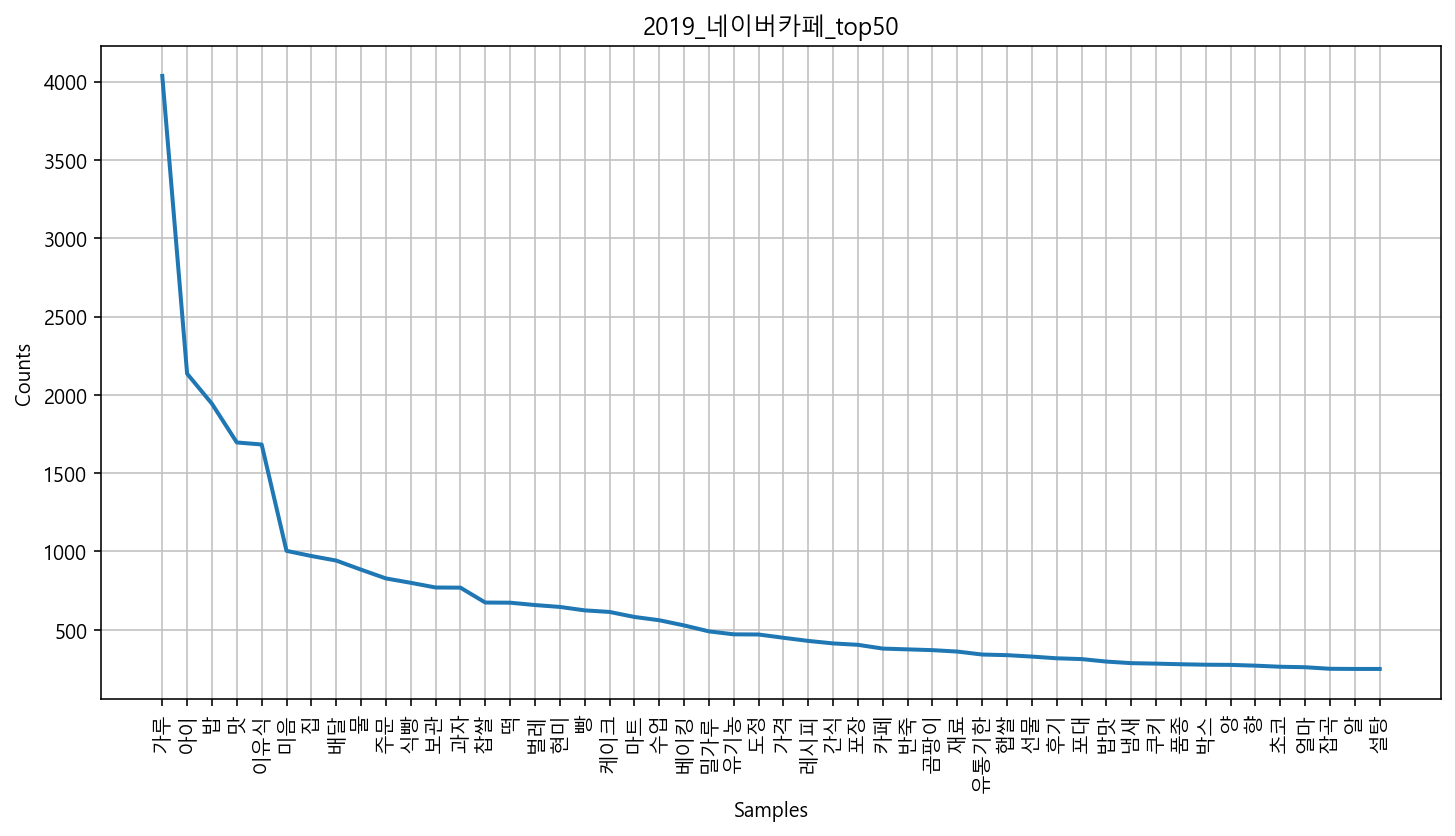

In [112]:
ko = [each_word for each_word in nouns2 if each_word not in stopwords_nouns]
ko = nltk.Text(ko, name = '네이버카페_2019_쌀')
print(len(ko.tokens)) 
print(len(set(ko.tokens)))
ko.vocab()
plt.figure(figsize=(12,6))

#title 바꾸기
plt.title("2019_네이버카페_top50")
ko.plot(50)
plt.show()